In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [3]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

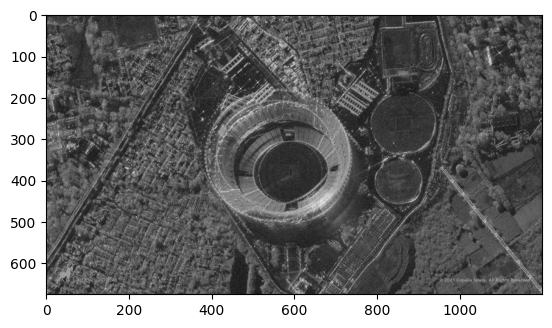

In [4]:
plt.imshow(image_gray, cmap="gray")

In [5]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]],
      shape=(675, 1200), dtype=uint8)

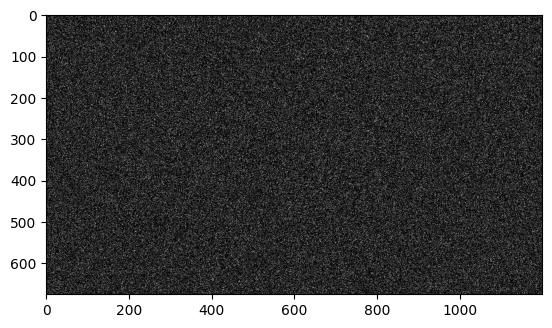

In [6]:
plt.imshow(noise_gauss, cmap="gray")

In [7]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [8]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [9]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

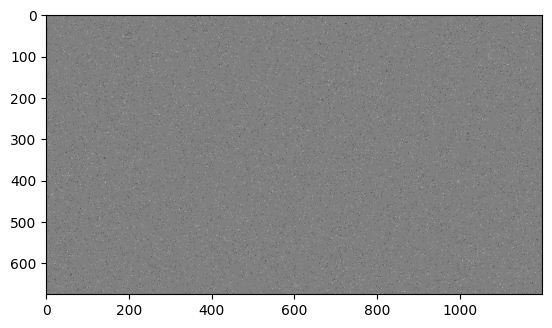

In [10]:
plt.imshow(bg_image, cmap="gray")

In [11]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

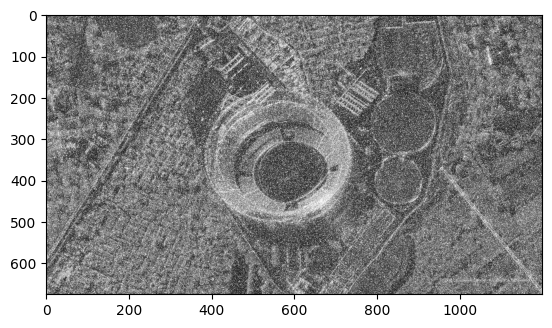

In [12]:
plt.imshow(image_noise_gauss, cmap="gray")

In [13]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [14]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [15]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [16]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


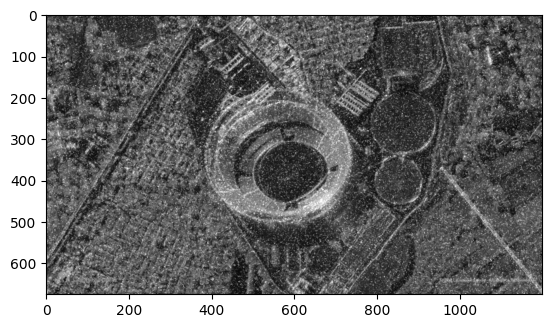

In [17]:
plt.imshow(image_gauss_median, cmap="gray")

In [18]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

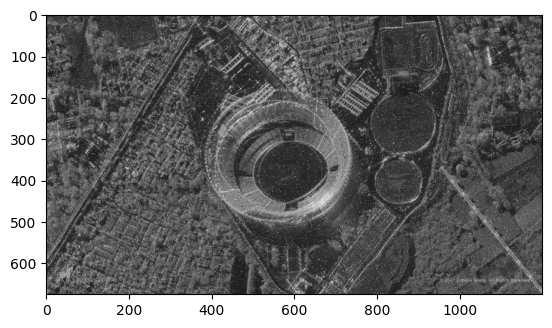

In [19]:
plt.imshow(image_sp, cmap="gray")

In [20]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

385.8562864197531 0.7222082220260068


In [21]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [22]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.7378037037037 0.8161619367646703


# Другие типы фильтров

In [23]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [24]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [25]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [26]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\Вика\AppData\Local\Temp\ipykernel_16452\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


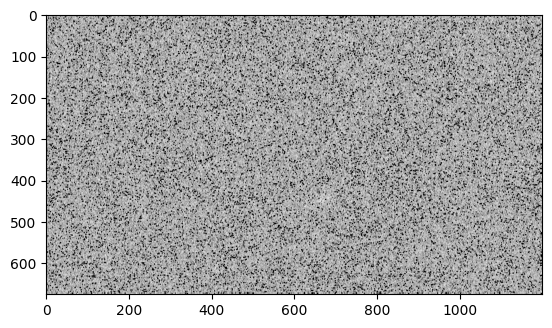

In [27]:
plt.imshow(res, cmap="gray")

In [28]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.976648148148 0.02746126776511091



# 2D свертка

In [29]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [30]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [31]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [32]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

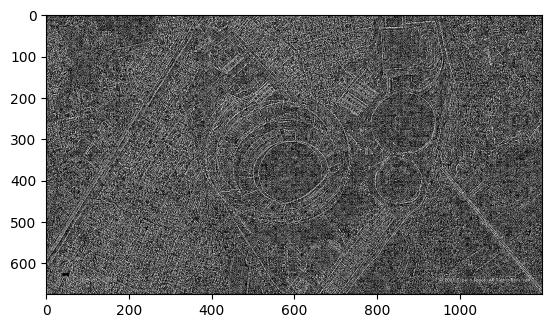

In [33]:
plt.imshow(image_lapl, cmap="gray")

In [34]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

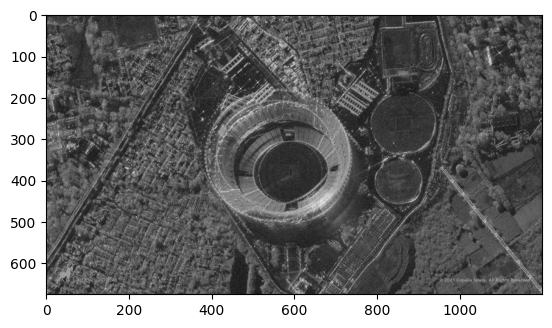

In [35]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

[[  0  84  79 ...   0 255 130]
 [ 62  27  22 ... 105   6 111]
 [ 28   0  57 ... 127 145   0]
 ...
 [  0   0 136 ...  51 116 133]
 [ 43  17  32 ...  45   0  81]
 [143 159   0 ...  25   0 169]]


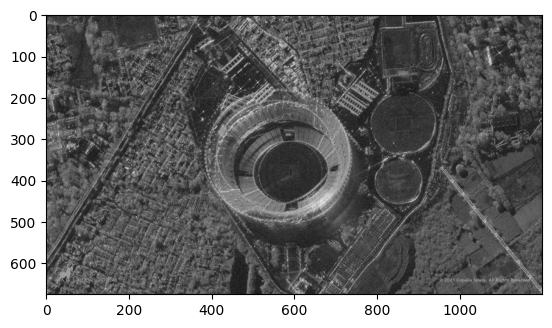

In [36]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
image_noise_gauss = cv2.add(image_gray,noise_gauss)
print(cv2.randn(noise_gauss, mean, stddev))
plt.imshow(image_noise_gauss, cmap="gray")

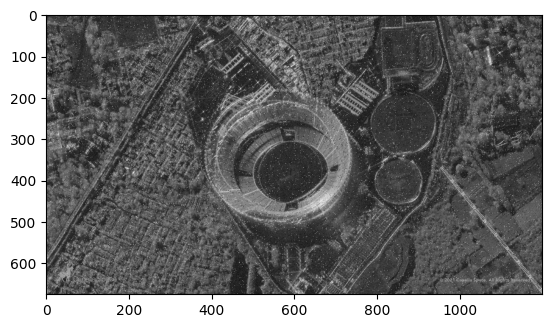

In [42]:
noise = np.random.randint(0, 101, size=(image_gray.shape[0], image_gray.shape[1]), dtype=int)

zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

image_const_noisy = image_gray.copy()

image_const_noisy[zeros_pixel] = 0

image_const_noisy[ones_pixel] = 255

plt.imshow(image_const_noisy, cmap="gray")



--- Гауссовский ---
median    | MSE=93.40, SSIM=0.8190
gauss     | MSE=100.30, SSIM=0.8115
bilateral | MSE=207.63, SSIM=0.5739
nlm       | MSE=116.73, SSIM=0.6793
Лучший: median (SSIM=0.8190)


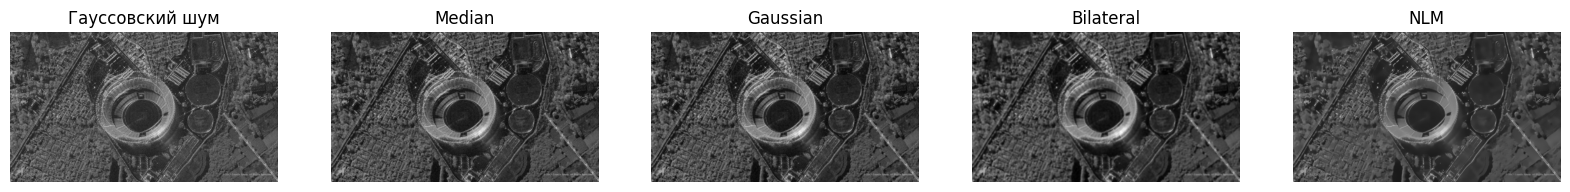

In [41]:
# 2 Для Гауссовского шума
results_gauss = {}
median_gauss = cv2.medianBlur(image_noise_gauss, 3)
results_gauss["median"] = (median_gauss, mean_squared_error(image_gray, median_gauss),
                     structural_similarity(image_gray, median_gauss))

gauss_gauss = cv2.GaussianBlur(image_noise_gauss, (5,5), 1)
results_gauss["gauss"] = (gauss_gauss, mean_squared_error(image_gray, gauss_gauss),
                    structural_similarity(image_gray, gauss_gauss))

bilateral_gauss = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
results_gauss["bilateral"] = (bilateral_gauss, mean_squared_error(image_gray, bilateral_gauss),
                        structural_similarity(image_gray, bilateral_gauss))

nlm_gauss = cv2.fastNlMeansDenoising(image_noise_gauss, h=15)
results_gauss["nlm"] = (nlm_gauss, mean_squared_error(image_gray, nlm_gauss),
                  structural_similarity(image_gray, nlm_gauss))

print("\n--- Гауссовский ---")
best_gauss = None
for k, (img_filt, mse, ssim) in results_gauss.items():
    print(f"{k:9s} | MSE={mse:.2f}, SSIM={ssim:.4f}")
    if best_gauss is None or ssim > best_gauss[2]:
        best_gauss = (k, mse, ssim)

print(f"Лучший: {best_gauss[0]} (SSIM={best_gauss[2]:.4f})")

fig, axs = plt.subplots(1, 5, figsize=(20,15))
axs[0].imshow(image_noise_gauss, cmap="gray"); axs[0].set_title("Гауссовский шум")
axs[1].imshow(results_gauss["median"][0], cmap="gray"); axs[1].set_title("Median")
axs[2].imshow(results_gauss["gauss"][0], cmap="gray"); axs[2].set_title("Gaussian")
axs[3].imshow(results_gauss["bilateral"][0], cmap="gray"); axs[3].set_title("Bilateral")
axs[4].imshow(results_gauss["nlm"][0], cmap="gray"); axs[4].set_title("NLM")
for ax in axs: ax.axis("off")
plt.show()




--- Постоянный ---
median    | MSE=95.58, SSIM=0.8164
gauss     | MSE=135.78, SSIM=0.7492
bilateral | MSE=264.88, SSIM=0.5203
nlm       | MSE=310.05, SSIM=0.6291
Лучший: median (SSIM=0.8164)


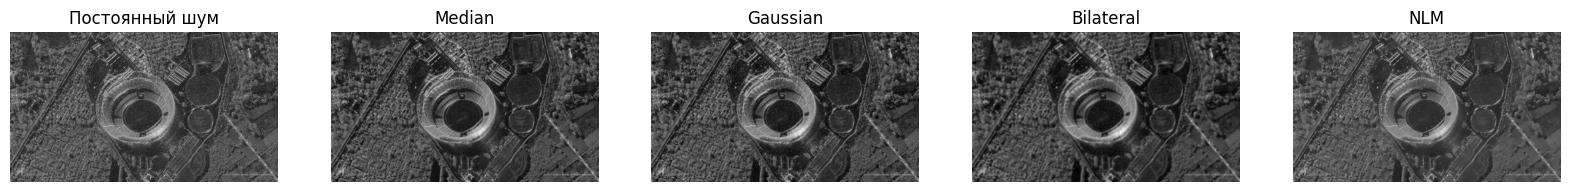

In [44]:
#2 Для Постоянного шума
results_const = {}

median_const = cv2.medianBlur(image_const_noisy, 3)
results_const["median"] = (median_const, mean_squared_error(image_gray, median_const),
                     structural_similarity(image_gray, median_const))

gauss_const = cv2.GaussianBlur(image_const_noisy, (5,5), 1)
results_const["gauss"] = (gauss_const, mean_squared_error(image_gray, gauss_const),
                    structural_similarity(image_gray, gauss_const))

bilateral_const = cv2.bilateralFilter(image_const_noisy, 9, 75, 75)
results_const["bilateral"] = (bilateral_const, mean_squared_error(image_gray, bilateral_const),
                        structural_similarity(image_gray, bilateral_const))

nlm_const = cv2.fastNlMeansDenoising(image_const_noisy, h=15)
results_const["nlm"] = (nlm_const, mean_squared_error(image_gray, nlm_const),
                  structural_similarity(image_gray, nlm_const))

print("\n--- Постоянный ---")
best_const = None
for k, (img_filt, mse, ssim) in results_const.items():
    print(f"{k:9s} | MSE={mse:.2f}, SSIM={ssim:.4f}")
    if best_const is None or ssim > best_const[2]:
        best_const = (k, mse, ssim)

print(f"Лучший: {best_const[0]} (SSIM={best_const[2]:.4f})")

fig, axs = plt.subplots(1, 5, figsize=(20,15))
axs[0].imshow(image_const_noisy, cmap="gray"); axs[0].set_title("Постоянный шум")
axs[1].imshow(results_const["median"][0], cmap="gray"); axs[1].set_title("Median")
axs[2].imshow(results_const["gauss"][0], cmap="gray"); axs[2].set_title("Gaussian")
axs[3].imshow(results_const["bilateral"][0], cmap="gray"); axs[3].set_title("Bilateral")
axs[4].imshow(results_const["nlm"][0], cmap="gray"); axs[4].set_title("NLM")
for ax in axs: ax.axis("off")
plt.show()